In [ ]:
# going off of this tutorial here: https://carpentries-incubator.github.io/SDC-BIDS-fMRI/aio/index.html


In [1]:
# pip install bids

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 3.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 25.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.1 MB/s eta 0:00:0000:0100:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=aabe64e96a1efbc6036ada74fad49499e6e11a346cd89795166a6237fc9e812b
  Stored in directory: /Users/angelafang/Library/Caches/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c

In [2]:
import bids
import os
import matplotlib.pyplot as plt #to enable plotting within notebook
from nilearn import image as nimg
from nilearn import plotting as nplot
from bids.layout import BIDSLayout
import numpy as np
%matplotlib inline

In [26]:
layout = bids.BIDSLayout('/Volumes/Seagate Desktop Drive/Flanker/derivatives', validate=False,
                  config=['bids','derivatives'])
layout

BIDS Layout: ...ktop Drive/Flanker/derivatives | Subjects: 1 | Sessions: 0 | Runs: 2

In [27]:
T1w_files = layout.get(subject='08',
                       datatype='anat', desc='preproc',
                       space='MNI152NLin2009cAsym',
                       extension="nii.gz",
                      return_type='file')

brainmask_files = layout.get(subject='08',
                             datatype='anat', suffix='mask',
                             desc='brain',
                             space='MNI152NLin2009cAsym',
                             extension="nii.gz",
                            return_type='file')

func_files = layout.get(subject='08',
                        datatype='func', desc='preproc',
                       space='MNI152NLin2009cAsym',
                       extension="nii.gz",
                       return_type='file')

func_mask_files = layout.get(subject='08',
                             datatype='func', suffix='mask',
                             desc='brain',
                             space='MNI152NLin2009cAsym',
                             extension="nii.gz",
                            return_type='file')


In [28]:
func_mni = func_files[0]
func_mni_img = nimg.load_img(func_mni)


In [29]:
func_mni_img.shape


(97, 115, 97, 146)

In [31]:
## visualizing time-series

import matplotlib.pyplot as plt

In [33]:
single_vox = func_mni_img.slicer[59:60,45:46,30:31,:].get_fdata()
single_vox.shape

(1, 1, 1, 146)

In [34]:
single_vox = single_vox.flatten()
single_vox.shape

(146,)

Text(0, 0.5, 'Signal Value')

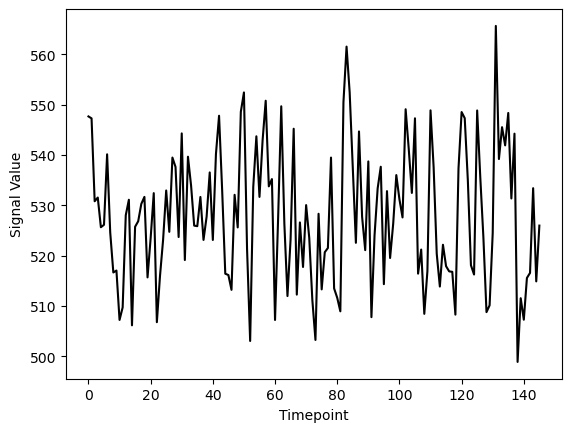

In [35]:
# Make an array counting from 0 --> 146, this will be our x-axis
x_axis = np.arange(0, single_vox.shape[0])

# Plot our x and y data, the 'k' just specifies the line color to be black
plt.plot( x_axis, single_vox, 'k')

# Label our axes
plt.xlabel('Timepoint')
plt.ylabel('Signal Value')

In [ ]:
# resampling func onto T1

In [36]:
# Files we'll be using (Notice that we're using _space-MNI...
# which means they are normalized brains)
T1_mni = T1w_files[0]
T1_mni_img = nimg.load_img(T1_mni)

In [37]:
print(T1_mni_img.shape)
print(func_mni_img.shape)

(97, 115, 97)
(97, 115, 97, 146)


(97, 115, 97)
(97, 115, 97, 146)


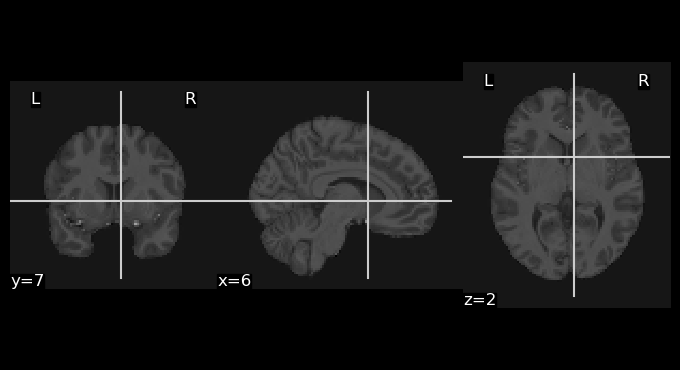

In [38]:
#Try playing around with methods of interpolation
#options: 'linear','continuous','nearest'
resamp_t1 = nimg.resample_to_img(source_img=T1_mni_img,target_img=func_mni_img,interpolation='continuous')
print(resamp_t1.shape)
print(func_mni_img.shape)
nplot.plot_anat(resamp_t1)

Cleaning confounds -- This process of removing motion-based artifacts from our data is called confound regression, which is essentially fitting a linear model using motion estimates as regressors then subtracting it out from the signal. Hopefully in this process we get a closer estimate of what the actual brain-induced BOLD signal looks like.

Loading in Data: 

In [40]:
import os
from nilearn import image as nimg
from nilearn import plotting as nplot
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
%matplotlib inline

In [41]:
import pandas as pd


In [42]:
sub = '08'
layout = bids.BIDSLayout('/Volumes/Seagate Desktop Drive/Flanker/derivatives', validate=False,
                  config=['bids','derivatives'])

In [61]:
T1w_files = layout.get(subject='08',
                       datatype='anat', desc='preproc',
                       space='MNI152NLin2009cAsym',
                       extension="nii.gz",
                      return_type='file')

func_files = layout.get(subject=sub,
                        datatype='func', task='flanker',
                        desc='preproc',
                        space='MNI152NLin2009cAsym',
                        extension='nii.gz',
                       return_type='file')

mask_files = layout.get(subject=sub,
                        datatype='func', task='flanker',
                        desc='brain',
                        suffix='mask',
                        space='MNI152NLin2009cAsym',
                        extension="nii.gz",
                       return_type='file')

confound_files = layout.get(subject=sub,
                            datatype='func', task='flanker',
                            desc='confounds',
                           extension="tsv",
                           return_type='file')

In [67]:
anat_file = T1w_files[0]
func_file = func_files[0]
mask_file = mask_files[0]
confound_file = confound_files[0]

In [50]:
#Delimiter is \t --> tsv is a tab-separated spreadsheet
confound_df = pd.read_csv(confound_file, delimiter='\t')
confound_df.head()

,global_signal,global_signal_derivative1,global_signal_power2,global_signal_derivative1_power2,csf,csf_derivative1,csf_derivative1_power2,csf_power2,white_matter,white_matter_derivative1,...,rot_x_power2,rot_x_derivative1_power2,rot_y,rot_y_derivative1,rot_y_power2,rot_y_derivative1_power2,rot_z,rot_z_derivative1,rot_z_power2,rot_z_derivative1_power2
0,648.690084,NaN,420798.825564,NaN,760.128400,NaN,NaN,577795.184701,690.375476,NaN,...,3.005230e-06,NaN,0.000880,NaN,7.752362e-07,NaN,0.000074,NaN,5.542103e-09,NaN
1,647.149270,-1.540815,418802.177166,2.374110,740.308243,-19.820157,392.838625,548056.294809,690.752275,0.376799,...,2.407183e-08,2.491375e-06,0.000444,-0.000437,1.967206e-07,1.909192e-07,-0.000323,-3.970423e-04,1.040688e-07,1.576426e-07
2,647.726359,0.577089,419549.435863,0.333032,736.987026,-3.321217,11.030482,543149.876837,692.102920,1.350645,...,3.254091e-08,1.125884e-07,0.000198,-0.000246,3.919568e-08,6.029628e-08,0.000485,8.075300e-04,2.351600e-07,6.521047e-07
3,644.968869,-2.757490,415984.841700,7.603751,742.364459,5.377432,28.916780,551104.989523,691.257873,-0.845047,...,4.050398e-08,4.353482e-10,-0.000359,-0.000557,1.288092e-07,3.101142e-07,0.000235,-2.500000e-04,5.519351e-08,6.250000e-08
4,644.096125,-0.872743,414859.818750,0.761681,738.097133,-4.267326,18.210071,544787.377296,690.664313,-0.593561,...,8.156279e-08,2.370210e-07,-0.000379,-0.000020,1.436979e-07,4.070306e-10,0.000235,-1.000000e-09,5.519304e-08,1.000000e-18


The choice of which confounds to use in functional imaging analysis is a source of large debate. We recommend that you check out these sources for a start:

https://www.sciencedirect.com/science/article/pii/S1053811917302288#f0005
https://www.sciencedirect.com/science/article/pii/S1053811917302288 For now we’re going to replicate the pre-processing (mostly) from the seminal Yeo1000 17-networks paper: https://www.ncbi.nlm.nih.gov/pubmed/21653723


Using: 
The Yeo 2011 Pre-processing schema
Confound regressors
6 motion parameters (trans_x, trans_y, trans_z, rot_x, rot_y, rot_z)
Global signal (global_signal)
Cerebral spinal fluid signal (csf)
White matter signal (white_matter)
This is a total of 9 base confound regressor variables. Finally we add temporal derivatives of each of these signals as well (1 temporal derivative for each), the result is 18 confound regressors.


Also using: 
Low/High pass filtering
Low pass filtering cutoff: 0.08
High pass filtering cutoff: 0.009
Low pass filters out high frequency signals from our data. fMRI signals are slow evolving processes, any high frequency signals are likely due to noise High pass filters out any very low frequency signals (below 0.009Hz), which may be due to intrinsic scanner instabilities

Drop dummy TRs
During the initial stages of a functional scan there is a strong signal decay artifact, thus the first 4ish or so TRs are very high intensity signals that don’t reflect the rest of the scan. Therefore we drop these timepoints.

Censoring + Interpolation (leaving out)
Censoring involves removal and interpolation of high-movement frames from the fMRI data. Interpolation is typically done using sophisticated algorithms much like Power et al. 2014.

We won’t be using censoring + interpolation since its fairly complicated and would take up too much time

In [54]:
# Select confounds
confound_vars = ['trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z',
                 'global_signal',
                 'csf', 'white_matter']

In [52]:
# Get derivative column names
derivative_columns = ['{}_derivative1'.format(c) for c
                     in confound_vars]

print(derivative_columns)

['trans_x_derivative1', 'trans_y_derivative1', 'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1', 'rot_z_derivative1', 'global_signal_derivative1', 'csf_derivative1', 'white_matter_derivative1']


In [55]:
final_confounds = confound_vars + derivative_columns
print(final_confounds)

['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z', 'global_signal', 'csf', 'white_matter', 'trans_x_derivative1', 'trans_y_derivative1', 'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1', 'rot_z_derivative1', 'global_signal_derivative1', 'csf_derivative1', 'white_matter_derivative1']


In [57]:
confound_df = confound_df[final_confounds]
confound_df.head()

# note derivative will always be NaN for first column bc there's no prior signal to take difference of 

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,global_signal,csf,white_matter,trans_x_derivative1,trans_y_derivative1,trans_z_derivative1,rot_x_derivative1,rot_y_derivative1,rot_z_derivative1,global_signal_derivative1,csf_derivative1,white_matter_derivative1
0,0.015498,-0.002126,0.060533,-0.001734,0.000880,0.000074,648.690084,760.128400,690.375476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000089,0.039753,-0.081415,-0.000155,0.000444,-0.000323,647.149270,740.308243,690.752275,-0.015587,0.041879,-0.141948,0.001578,-0.000437,-3.970423e-04,-1.540815,-19.820157,0.376799
2,0.002478,-0.004405,-0.044804,0.000180,0.000198,0.000485,647.726359,736.987026,692.102920,0.002567,-0.044158,0.036612,0.000336,-0.000246,8.075300e-04,0.577089,-3.321217,1.350645
3,0.008770,0.055221,-0.052549,0.000201,-0.000359,0.000235,644.968869,742.364459,691.257873,0.006292,0.059626,-0.007745,0.000021,-0.000557,-2.500000e-04,-2.757490,5.377432,-0.845047
4,0.025985,0.053127,0.019021,-0.000286,-0.000379,0.000235,644.096125,738.097133,690.664313,0.017214,-0.002094,0.071570,-0.000487,-0.000020,-1.000000e-09,-0.872743,-4.267326,-0.593561


In [59]:
#First we'll load in our data and check the shape
raw_func_img = nimg.load_img(func_file)
raw_func_img.shape

(97, 115, 97, 146)

Recall that the fourth dimension represents frames/TRs(timepoints). We want to drop the first four timepoints entirely, to do so we use nibabel’s slicer feature. We’ll also drop the first 4 confound variable timepoints to match the functional scan

In [60]:
# dropping dummy scans (if you want) 
func_img = raw_func_img.slicer[:,:,:,4:]
func_img.shape

(97, 115, 97, 142)

!!! FIRST LEVEL !!!!! 

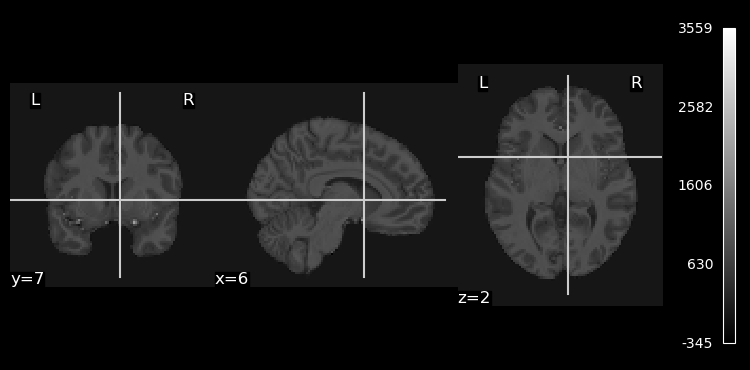

In [69]:
# visualizing T1: 

from nilearn.plotting import plot_anat, plot_img, plot_stat_map

plot_anat(anat_file, colorbar=True, cbar_tick_format="%i")

In [77]:
# load in functional data 

sub = '08'
layout = bids.BIDSLayout('/Volumes/Seagate Desktop Drive/Flanker/derivatives', validate=False,
                  config=['bids','derivatives'])
fmri_imgs = layout.get(subject=sub,
                        datatype='func', task='flanker',
                        desc='preproc',
                        space='MNI152NLin2009cAsym',
                        extension='nii.gz',
                       return_type='file')
fmri_imgs

['/Volumes/Seagate Desktop Drive/Flanker/derivatives/sub-08/func/sub-08_task-flanker_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
 '/Volumes/Seagate Desktop Drive/Flanker/derivatives/sub-08/func/sub-08_task-flanker_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz']

In [78]:
# for plotting on mean/template img 
from nilearn.image import mean_img

mean_img_ = mean_img(fmri_imgs[0])

Building the design matrix

In [106]:
# Building the design matrix! 

%matplotlib inline

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from nltools.file_reader import onsets_to_dm
from nltools.stats import regress, zscore
from nltools.data import Brain_Data, Design_Matrix
from nltools.stats import find_spikes 
from nilearn.plotting import view_img, glass_brain, plot_stat_map
from bids import BIDSLayout, BIDSValidator

layout = bids.BIDSLayout('/Volumes/Seagate Desktop Drive/Flanker/derivatives', validate=False,
                  config=['bids','derivatives'])
layout
layout_raw = bids.BIDSLayout('/Volumes/Seagate Desktop Drive/Flanker/', validate=True)
layout_raw

BIDS Layout: .../Seagate Desktop Drive/Flanker | Subjects: 26 | Sessions: 0 | Runs: 52

To build the design matrix, we will be using the Design_Matrix class from the nltools toolbox. First, we use pandas to load the text file that contains the onset and duration for each condition of the task. Rows reflect measurements in time sampled at 1/tr cycles per second. Columns reflect distinct conditions. Conditions are either on or off. We then cast this Pandas DataFrame as a Design_Matrix object. Be sure to specify the sampling frequency, which is 1/tr

In [167]:
def load_bids_events(layout, subject):
    '''Create a design_matrix instance from BIDS event file'''
    
    tr = layout.get_tr()
    func_files = layout.get(subject=subject,
                        datatype='func', task='flanker',
                        desc='preproc',
                        space='MNI152NLin2009cAsym',
                        extension='nii.gz',
                       return_type='file')
    func_file = nimg.load_img(func_files[0])
    n_tr = func_file.shape[-1]

    onsets = pd.read_csv(layout_raw.get(subject=subject, suffix='events')[0].path, sep='\t')
    onsets_actual = onsets.iloc[:, [0,1,7]]
    onsets_actual.columns = ['onset', 'duration','trial_type']
    sampling_freq = 1/tr
    n_scans=n_tr
    return onsets_actual, tr, n_scans

events,tr,n_scans = load_bids_events(layout, '08')
### note ^ the code above fully loads in a func file type which is pretty computationally expensive -- if you can figure out how to load in just the file size that would be ideal 

Will wanna convolve the design matrix with the hrf model (maybe just use spm?), a drift order / model (polynomial = 3), and the 6 motion regressors -- below is how we would set that up

['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']


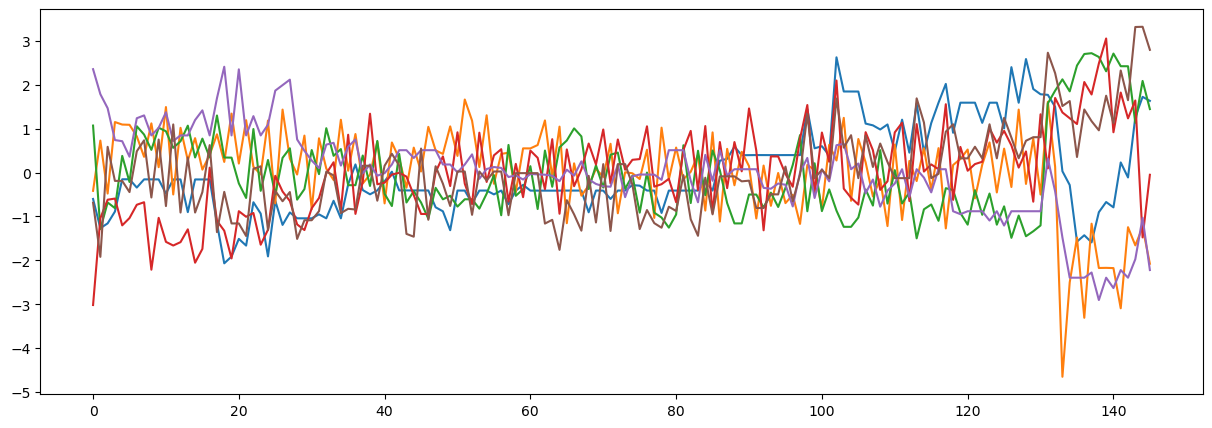

In [164]:
# loading in confounds file from fmriprep derivatives
sub = '08'
confound_files = layout.get(subject=sub,
                            datatype='func', task='flanker',
                            desc='confounds',
                           extension="tsv",
                           return_type='file')

confound_df = pd.read_csv(confound_file, delimiter='\t')
confound_df.head()

# Select confounds
confound_vars = ['trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z']

final_confounds = confound_vars
print(final_confounds)

confound_df = confound_df[final_confounds]
confound_df.head()
#mc = covariates[['trans_x','trans_y','trans_z','rot_x', 'rot_y', 'rot_z']]
plt.figure(figsize=(15,5))
plt.plot(zscore(confound_df))
#plt.figure(figsize=(15,5))
#plt.plot(zscore(mc))

<Axes: label='conditions', ylabel='scan number'>

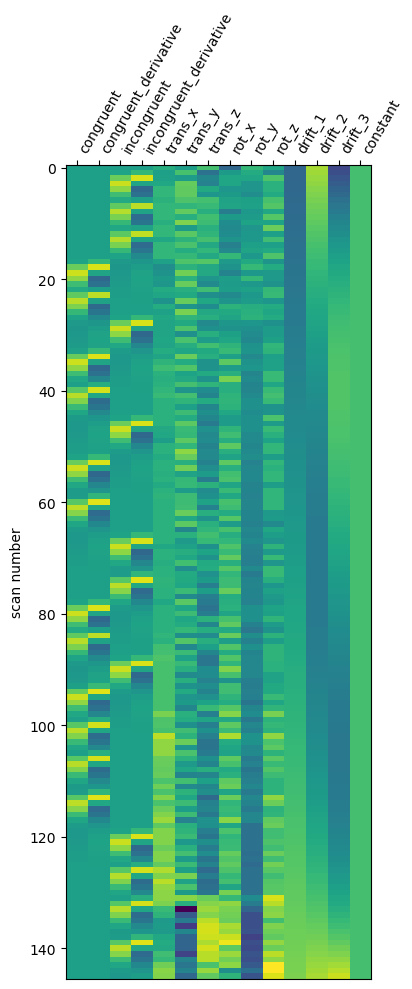

In [230]:
# actually making / convolving the design matrix! 

from nilearn.plotting import plot_design_matrix

# tr and n_scans defined by load_bids_events
frame_times = np.arange(n_scans) * tr  # here are the corresponding frame times

from nilearn.glm.first_level import make_first_level_design_matrix

hrf_model = "spm + derivative"
X1 = make_first_level_design_matrix(
    frame_times,
    events,
    drift_model="polynomial",
    drift_order=3,
    add_regs=confound_df,
    add_reg_names=confound_vars,
    hrf_model=hrf_model,
    high_pass = 0.01
)

plot_design_matrix(X1)


In [231]:
sub = '08'
layout = bids.BIDSLayout('/Volumes/Seagate Desktop Drive/Flanker/derivatives', validate=False,
                  config=['bids','derivatives'])
fmri_imgs = layout.get(subject=sub,
                        datatype='func', task='flanker',
                        desc='preproc',
                        space='MNI152NLin2009cAsym',
                        extension='nii.gz',
                       return_type='file')
fmri_imgs

['/Volumes/Seagate Desktop Drive/Flanker/derivatives/sub-08/func/sub-08_task-flanker_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz',
 '/Volumes/Seagate Desktop Drive/Flanker/derivatives/sub-08/func/sub-08_task-flanker_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz']

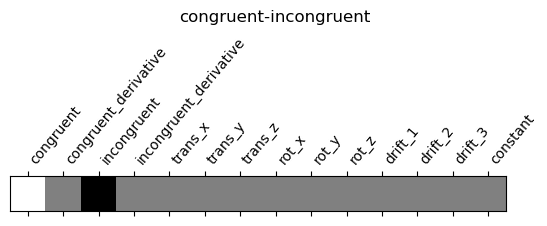

In [232]:
# MAKING CONTRASTS FOR FIRST LEVEL BETAS

from nilearn.glm.first_level import FirstLevelModel
from nilearn import plotting
from nilearn.plotting import plot_contrast_matrix

### change depending on task / ideal contrasts 
def make_localizer_contrasts(design_matrix):
    """Return a dictionary of four contrasts, given the design matrix."""
    # first generate canonical contrasts
    contrast_matrix = np.eye(design_matrix.shape[1])
    contrasts = {
        column: contrast_matrix[i]
        for i, column in enumerate(design_matrix.columns)
    }
    contrasts = {
        "congruent-incongruent": (
            contrasts["congruent"]
            - contrasts["incongruent"]
        ),
    }
    return contrasts

from nilearn.plotting import plot_contrast_matrix

contrasts = make_localizer_contrasts(X1)

for key, values in contrasts.items():
    plot_contrast_matrix(values, design_matrix=X1)
    plt.suptitle(key)

plt.show()

In [233]:
# Contrast estimation + plotting 

from nilearn import plotting

def plot_contrast(first_level_model):
    """Specify, estimate and plot the main contrasts \
        for given a first model."""
    design_matrix = first_level_model.design_matrices_[0]
    # Call the contrast specification within the function
    contrasts = make_localizer_contrasts(design_matrix)
    plt.figure(figsize=(20, 4))
    # compute the per-contrast z-map
    for index, (contrast_id, contrast_val) in enumerate(contrasts.items()):
        ax = plt.subplot(1, len(contrasts), 1 + index)
        z_map = first_level_model.compute_contrast(
            contrast_val, output_type="z_score"
        )
        plotting.plot_stat_map(
            z_map,
            display_mode="z",
            threshold=3.0,
            title=contrast_id,
            axes=ax,
            cut_coords=1,
        )

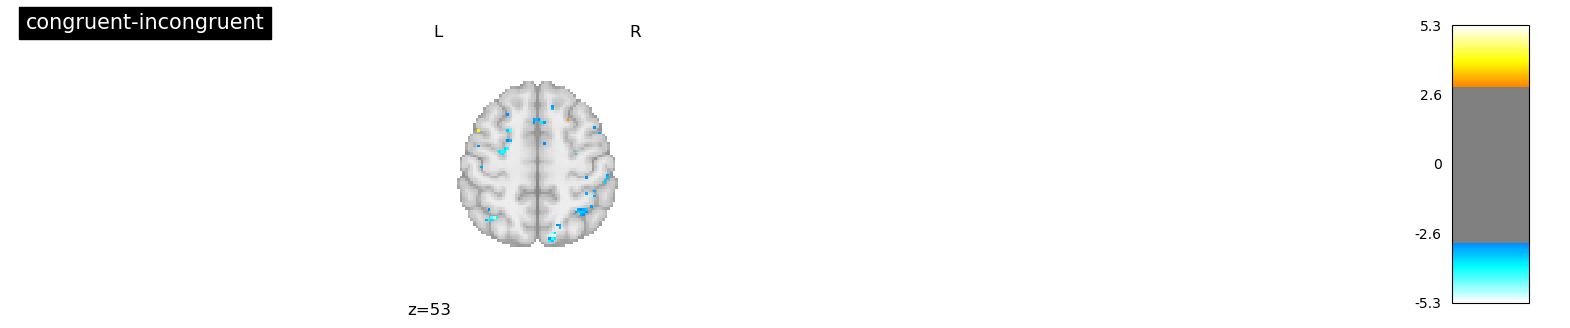

In [234]:
fmri_glm = FirstLevelModel()
#using design matrix X1 and run-1 functional data -- would need to concatenate both to do both runs
fmri_glm = fmri_glm.fit(fmri_imgs[0], design_matrices=X1)
plot_contrast(fmri_glm)
plt.show()

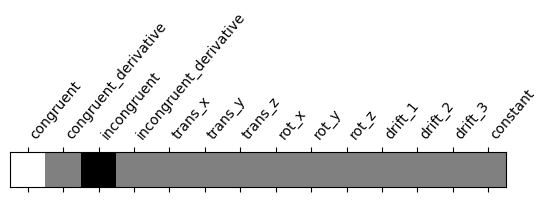

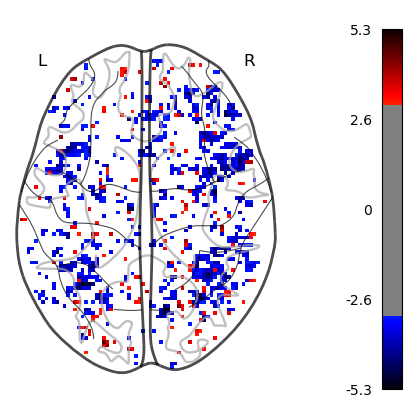

In [235]:
from nilearn.plotting import plot_contrast_matrix
from scipy.stats import norm

z_map = fmri_glm.compute_contrast("congruent-incongruent")
plot_contrast_matrix("congruent-incongruent", X1)
plotting.plot_glass_brain(
    z_map,
    colorbar=True,
    threshold=norm.isf(0.001),
    plot_abs=False,
    display_mode="z",
    figure=plt.figure(figsize=(4, 4)),
)
plt.show()

In [236]:
# Getting cluster tables 
from nilearn.reporting import get_clusters_table

table = get_clusters_table(z_map, norm.isf(0.001), 10)
print(table.to_latex())


\begin{tabular}{lllllll}
\toprule
 & Cluster ID & X & Y & Z & Peak Stat & Cluster Size (mm3) \\
\midrule
\bottomrule
\end{tabular}



/Users/angelafang/opt/anaconda3/envs/nilearn/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:339: UserWarning: Attention: No clusters with stat higher than 3.090232306167813
  warnings.warn(


/Users/angelafang/opt/anaconda3/envs/nilearn/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  indices of the same shape as `a` that index data along the given



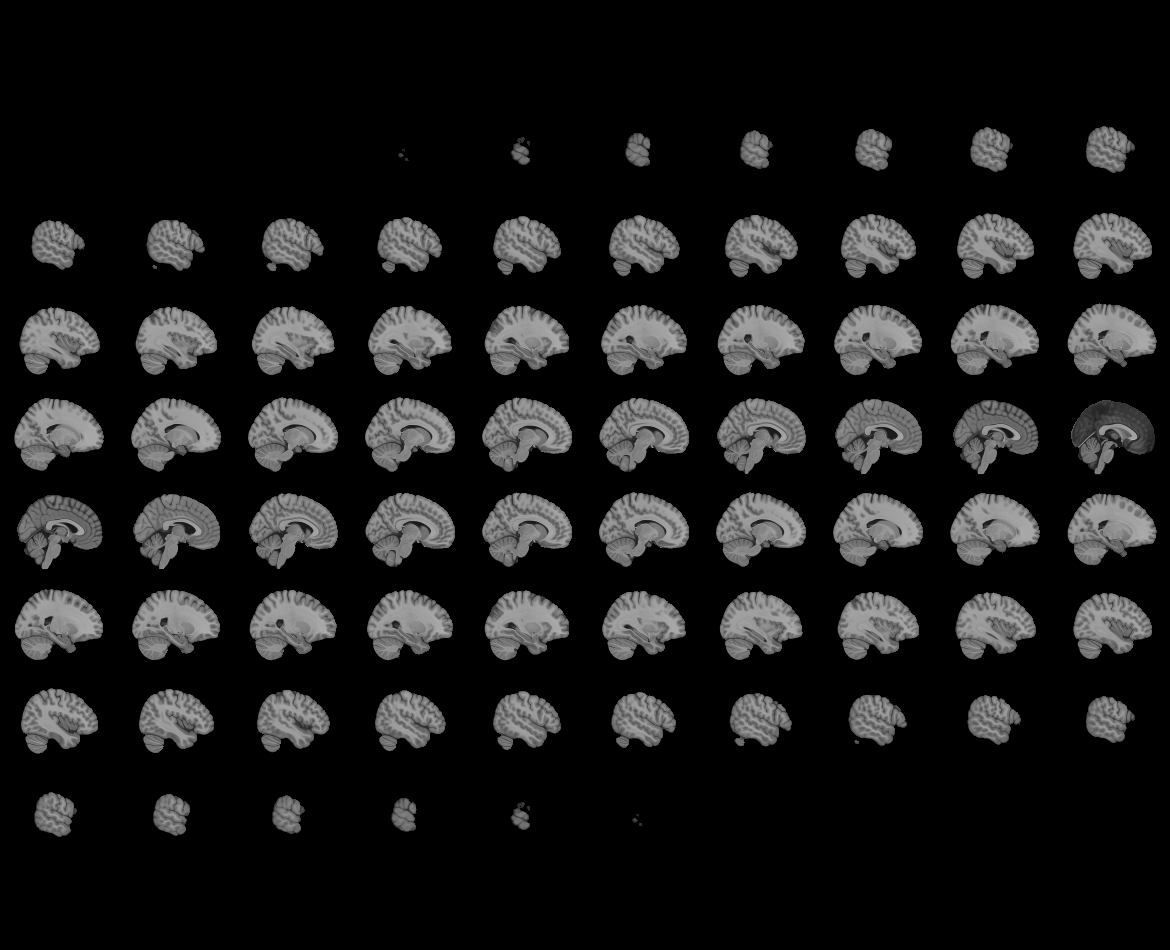
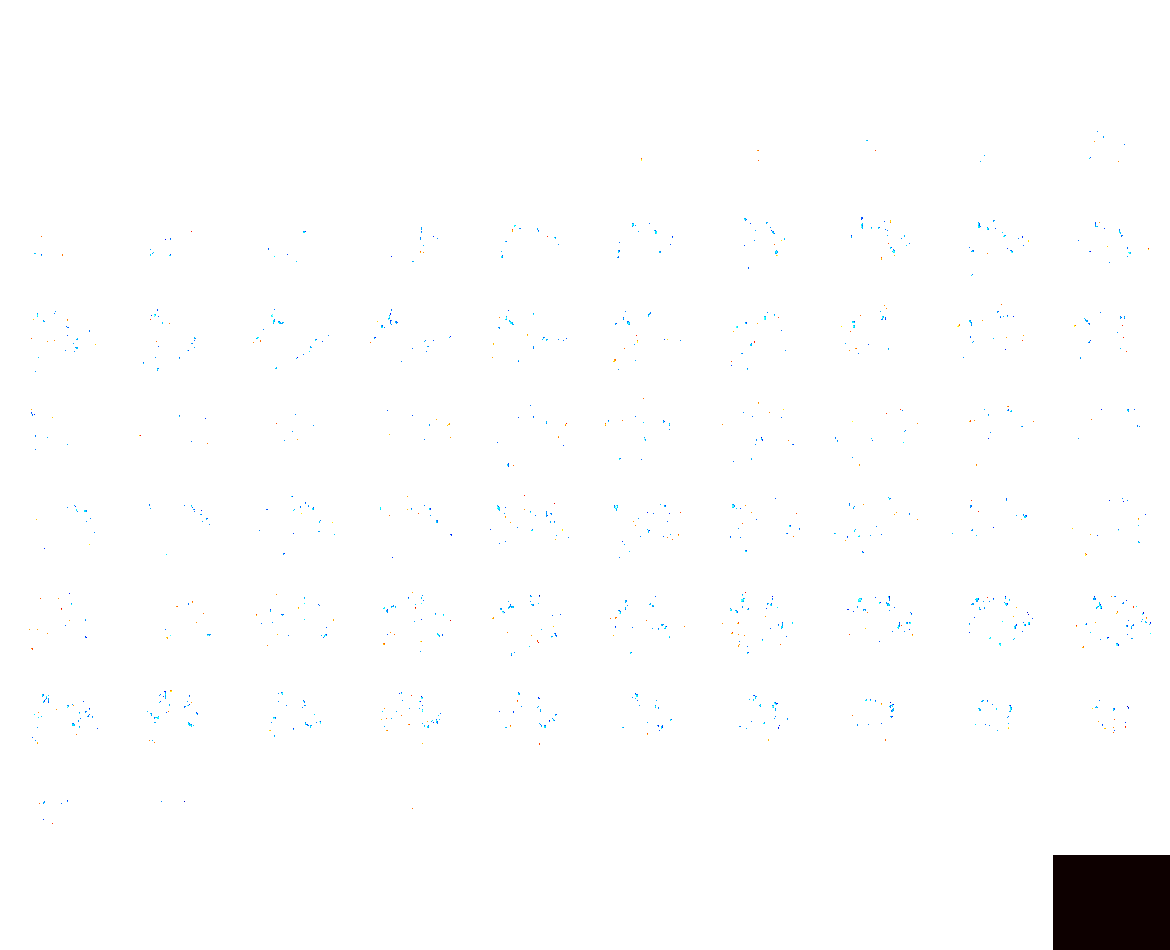

In [238]:
# Interactive view! 
view = plotting.view_img(z_map, threshold=3)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

Multiple runs 1 subject !!! 

In [240]:
# create results output directory within current working directory 

from pathlib import Path

output_dir = Path.cwd() / "results" / "plot_two_runs_model"
output_dir.mkdir(exist_ok=True, parents=True)
print(f"Output will be saved to: {output_dir}")

Output will be saved to: /Users/angelafang/Desktop/results/plot_two_runs_model


In [278]:
import numpy as np
import pandas as pd

sub = '08'
layout = bids.BIDSLayout('/Volumes/Seagate Desktop Drive/Flanker/derivatives', validate=False,
                  config=['bids','derivatives'])
fmri_imgs = layout.get(subject=sub,
                        datatype='func', task='flanker',
                        desc='preproc',
                        space='MNI152NLin2009cAsym',
                        extension='nii.gz',
                       return_type='file')
fmri_imgs

layout_raw = bids.BIDSLayout('/Volumes/Seagate Desktop Drive/Flanker/', validate=True)
layout_raw

BIDS Layout: .../Seagate Desktop Drive/Flanker | Subjects: 26 | Sessions: 0 | Runs: 52

In [299]:
# creating design matrix files for each run 
def load_bids_events(layout,layout_raw, subject, run):
    '''Create a design_matrix instance from BIDS event file'''
    
    tr = layout.get_tr()
    func_files = layout.get(subject=subject,
                        datatype='func', task='flanker',
                        desc='preproc',
                        space='MNI152NLin2009cAsym',
                        extension='nii.gz',
                       return_type='file')
    func_file = nimg.load_img(func_files[run])
    n_tr = func_file.shape[-1]

    onsets = pd.read_csv(layout_raw.get(subject=subject, suffix='events')[run].path, sep='\t')
    onsets_actual = onsets.iloc[:, [0,1,7]]
    onsets_actual.columns = ['onset', 'duration','trial_type']
    sampling_freq = 1/tr
    n_scans=n_tr
    return onsets_actual, tr, n_scans

run = 0
events1,tr1,n_scans1 = load_bids_events(layout,layout_raw, sub, run)

run = 1
events2,tr2,n_scans2 = load_bids_events(layout,layout_raw, sub, run)


In [300]:
# concatenating the design matrices for each run 
design_files = [events1, events2]
design_matrices = [pd.DataFrame(df) for df in design_files]

design_matrices

[    onset  duration   trial_type
 0     0.0       2.0  incongruent
 1    10.0       2.0  incongruent
 2    20.0       2.0  incongruent
 3    32.0       2.0    congruent
 4    42.0       2.0    congruent
 5    52.0       2.0  incongruent
 6    64.0       2.0    congruent
 7    76.0       2.0    congruent
 8    88.0       2.0  incongruent
 9   102.0       2.0    congruent
 10  116.0       2.0    congruent
 11  130.0       2.0  incongruent
 12  144.0       2.0  incongruent
 13  154.0       2.0    congruent
 14  164.0       2.0    congruent
 15  174.0       2.0  incongruent
 16  184.0       2.0    congruent
 17  196.0       2.0    congruent
 18  208.0       2.0    congruent
 19  222.0       2.0    congruent
 20  236.0       2.0  incongruent
 21  248.0       2.0  incongruent
 22  260.0       2.0  incongruent
 23  274.0       2.0  incongruent,
     onset  duration   trial_type
 0     0.0       2.0  incongruent
 1    10.0       2.0  incongruent
 2    20.0       2.0  incongruent
 3    30.0   

['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
    trans_x   trans_y   trans_z     rot_x     rot_y     rot_z
0  0.015498 -0.002126  0.060533 -0.001734  0.000880  0.000074
1 -0.000089  0.039753 -0.081415 -0.000155  0.000444 -0.000323
2  0.002478 -0.004405 -0.044804  0.000180  0.000198  0.000485
3  0.008770  0.055221 -0.052549  0.000201 -0.000359  0.000235
4  0.025985  0.053127  0.019021 -0.000286 -0.000379  0.000235
    trans_x   trans_y   trans_z     rot_x     rot_y  rot_z
0  0.037466  0.048754 -0.138293  0.000300 -0.000000    0.0
1  0.020556  0.076361 -0.059534 -0.000278  0.000203    0.0
2  0.024064  0.034888 -0.073054 -0.000094 -0.000000    0.0
3  0.020668  0.053081 -0.059485 -0.000312  0.000200    0.0
4  0.012677  0.028156  0.035367  0.000074  0.000357    0.0


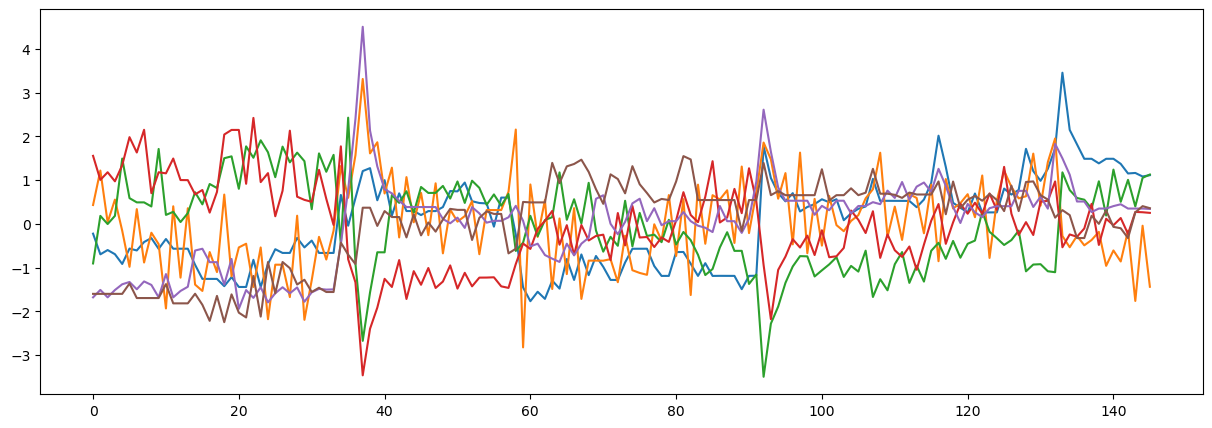

In [301]:
# loading in confound files: 
confound_files = layout.get(subject=sub,
                            datatype='func', task='flanker',
                            desc='confounds',
                           extension="tsv",
                           return_type='file')

confound_file1 = confound_files[0]
confound_file2 = confound_files[1]

# Select confounds
confound_vars = ['trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z']

final_confounds = confound_vars
print(final_confounds)


confound_df1 = pd.read_csv(confound_file1, delimiter='\t')
confound_df1 = confound_df1[final_confounds]
print(confound_df1.head())

confound_df2 = pd.read_csv(confound_file2, delimiter='\t')
confound_df2 = confound_df2[final_confounds]
print(confound_df2.head())

#mc = covariates[['trans_x','trans_y','trans_z','rot_x', 'rot_y', 'rot_z']]
plt.figure(figsize=(15,5))
plt.plot(zscore(confound_df2))


<Axes: label='conditions', ylabel='scan number'>

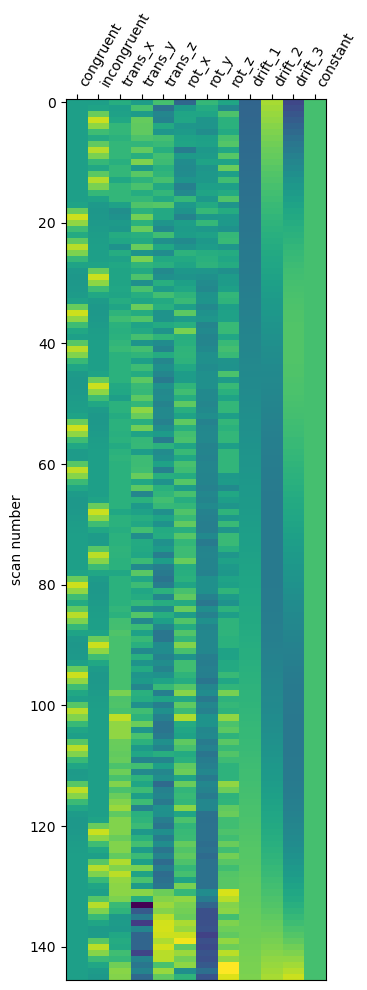

In [302]:
# convolving design matrix w motion confounds 

from nilearn.plotting import plot_design_matrix

# run-1 

# tr and n_scans defined by load_bids_events
frame_times = np.arange(n_scans1) * tr1  # here are the corresponding frame times

from nilearn.glm.first_level import make_first_level_design_matrix

hrf_model = "spm"
X1 = make_first_level_design_matrix(
    frame_times,
    events1,
    drift_model="polynomial",
    drift_order=3,
    add_regs=confound_df1,
    add_reg_names=confound_vars,
    hrf_model=hrf_model,
    high_pass = 0.01
)



<Axes: label='conditions', ylabel='scan number'>

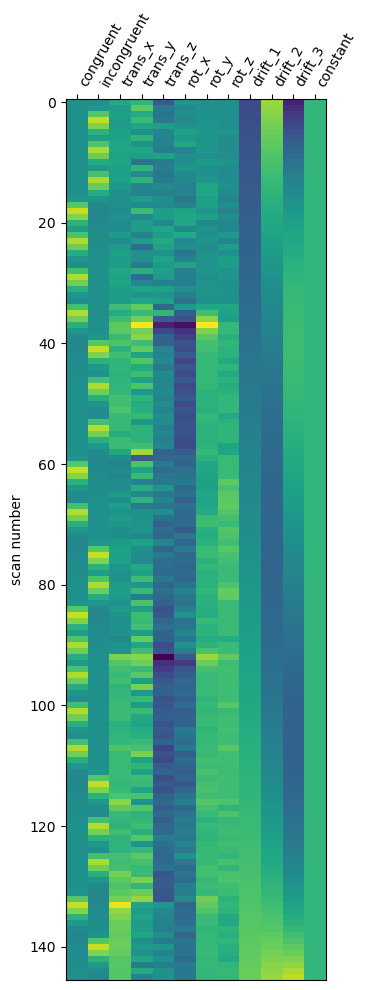

In [303]:
# run-2 

# tr and n_scans defined by load_bids_events
frame_times = np.arange(n_scans2) * tr2  # here are the corresponding frame times

from nilearn.glm.first_level import make_first_level_design_matrix

hrf_model = "spm"
X2 = make_first_level_design_matrix(
    frame_times,
    events2,
    drift_model="polynomial",
    drift_order=3,
    add_regs=confound_df2,
    add_reg_names=confound_vars,
    hrf_model=hrf_model,
    high_pass = 0.01
)

plot_design_matrix(X2)

In [325]:
del(design_matrix)

['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']


<Axes: label='conditions', ylabel='scan number'>

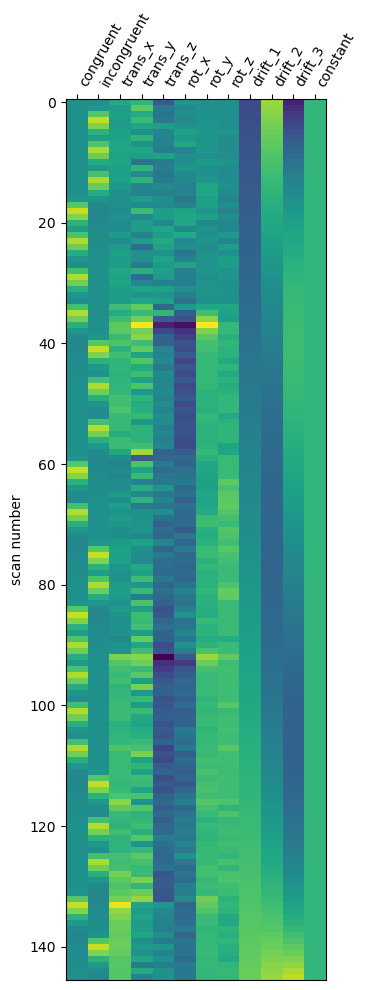

In [333]:
# enumerate over runs to make design matrix + convolve with 6 motion parameters 

# need to define layout, layout raw, sub)
hrf_model = "spm"
# The cutoff for the drift model is 0.01 Hz.
high_pass = 0.01

confound_files = layout.get(subject=sub,
                            datatype='func', task='flanker',
                            desc='confounds',
                           extension="tsv",
                           return_type='file')

# Select confounds
confound_vars = ['trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z']

final_confounds = confound_vars
print(final_confounds)

design_matrices = []

for idx, img in enumerate(fmri_imgs):
    # Build experimental paradigm
    run = idx
    events,tr,n_scans = load_bids_events(layout,layout_raw, sub, run)
    # Define the sampling times for the design matrix
    frame_times = np.arange(n_scans) * tr
    confound_file = confound_files[run]
    confound_df = pd.read_csv(confound_file, delimiter='\t')
    confound_df = confound_df[final_confounds]
    # Build design matrix with the previously defined parameters
    design_matrix = make_first_level_design_matrix(
        frame_times,
        events,
        hrf_model=hrf_model,
        drift_model="polynomial",
        drift_order=3,
        add_regs=confound_df,
        add_reg_names=confound_vars,
        high_pass=high_pass,
    )

    # put the design matrices in a list
    design_matrices.append(design_matrix)
    
# can visualize the design matrix with the line below 
#plot_design_matrix(design_matrices[1])

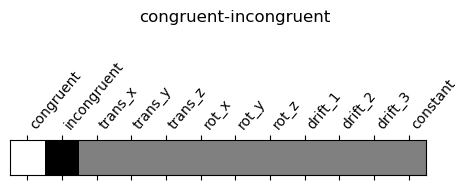

In [339]:
# making contrast, fitting first level 

from nilearn.glm.first_level import FirstLevelModel
from nilearn import plotting
from nilearn.plotting import plot_contrast_matrix

### change depending on task / ideal contrasts 
contrast_matrix = np.eye(design_matrix.shape[1])
basic_contrasts = {
    column: contrast_matrix[i]
    for i, column in enumerate(design_matrix.columns)
}

contrasts = {
    "congruent-incongruent": (basic_contrasts["congruent"] - basic_contrasts["incongruent"]),

}

from nilearn.plotting import plot_contrast_matrix

for key, values in contrasts.items():
    plot_contrast_matrix(values, design_matrix=X1)
    plt.suptitle(key)

plt.show()

In [335]:
from nilearn.glm.first_level import FirstLevelModel

print("Fitting a GLM")
fmri_glm = FirstLevelModel()
fmri_glm = fmri_glm.fit(fmri_imgs, design_matrices=design_matrices)

Fitting a GLM


Computing contrasts
	contrast id: congruent-incongruent


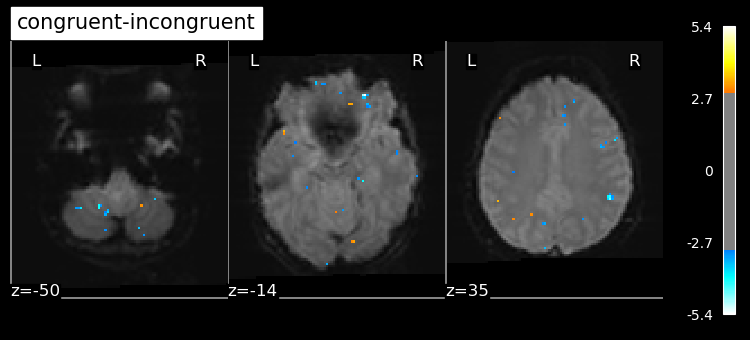

In [338]:
from nilearn import plotting
# creating mean img for plotting purposes 
from nilearn.image import mean_img

mean_image = mean_img(fmri_imgs[0])

print("Computing contrasts")

# Iterate on contrasts
for contrast_id, contrast_val in contrasts.items():
    print(f"\tcontrast id: {contrast_id}")
    # compute the contrasts
    z_map = fmri_glm.compute_contrast(contrast_val, output_type="z_score")
    # plot the contrasts as soon as they're generated
    # the display is overlaid on the mean fMRI image
    # a threshold of 3.0 is used, more sophisticated choices are possible
    plotting.plot_stat_map(
        z_map,
        bg_img=mean_image,
        threshold=3.0,
        display_mode="z",
        cut_coords=3,
        black_bg=True,
        title=contrast_id,
    )
    plotting.show()